<a href="https://colab.research.google.com/github/crisbpadilla/DataScience-M2M-course-Datatalent/blob/main/Capstonpjct1_cristobal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b>Concrete manufacturing analysis</b>

  The data was obtain from kaggle (https://www.kaggle.com/datasets/vinayakshanawad/cement-manufacturing-concrete-dataset?resource=download). This data contains the raw materials in kg/m^3 used to manufacture the concrete mix, plus de values of their respective compreshive strenght (Mpa) developed during a specific period of time measured in days.

  For this project each compressive strenght (CS) will be classify accordingly:

  * Class 1 : CS <11 kg/m^3
  * Class 2 : 10 kg/m^3 < CS < 21 kg/m^3
  * Class 3 : 20 kg/m^3 < CS < 31 kg/m^3
  * Class 4 : 30 kg/m^3 < CS < 41 kg/m^3
  * Class 5 : CS> 40 kg/m^3

The data was normalized so for each column ( fly ash, coarse aggregate, fines aggregate) was calculate their relative frecuency to get the proportion or percentage in the mix. From it, the stack bar chart was obtain to observe the relative composition of the mix according to their compressive strenght.

Also, with this data a widget is created to interact with the days after manufacturing, so to determined the influence of the different materials in their CS.






In [87]:
import pandas as pd

file=pd.read_csv('concrete.csv')

file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [88]:
file.head()
#compressive strenght is in MPa
# all the other variableas are in kg/m3
#age/days

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [89]:
columns=['cement','slag','ash','water','superplastic','coarseagg','fineagg']
file['total']=file[columns].sum(axis=1)
file
print(file.describe())

            cement         slag          ash        water  superplastic  \
count  1030.000000  1030.000000  1030.000000  1030.000000   1030.000000   
mean    281.167864    73.895825    54.188350   181.567282      6.204660   
std     104.506364    86.279342    63.997004    21.354219      5.973841   
min     102.000000     0.000000     0.000000   121.800000      0.000000   
25%     192.375000     0.000000     0.000000   164.900000      0.000000   
50%     272.900000    22.000000     0.000000   185.000000      6.400000   
75%     350.000000   142.950000   118.300000   192.000000     10.200000   
max     540.000000   359.400000   200.100000   247.000000     32.200000   

         coarseagg      fineagg          age     strength        total  
count  1030.000000  1030.000000  1030.000000  1030.000000  1030.000000  
mean    972.918932   773.580485    45.662136    35.817961  2343.523398  
std      77.753954    80.175980    63.169912    16.705742    65.365356  
min     801.000000   594.000000 

In [90]:
for column in file.columns:

  if column not in ['age','strength']:
    file[column]=(file[column]/file['total'])

n_file=file.copy()


In [91]:
import numpy as np

def category(data):

  ranges = [np.arange(0.00, 10.00,0.01), np.arange(10.00, 20.00,0.01), np.arange(20.0, 30.0),np.arange(30.0, 40.0)]

  if 11 > data > 0 :
    return 'class_1'
  elif 21 > data > 10:
    return 'class_2'
  elif 31 > data > 20:
    return 'class_3'
  elif 41 > data > 30:
    return 'class_4'
  elif data > 40:
    return 'class_5'

n_file['Concrete_Class'] = n_file['strength'].apply(category)

print(n_file.describe())
n_file.head()

            cement         slag          ash        water  superplastic  \
count  1030.000000  1030.000000  1030.000000  1030.000000   1030.000000   
mean      0.119553     0.031643     0.023174     0.077727      0.002621   
std       0.043101     0.036961     0.027462     0.010900      0.002495   
min       0.044815     0.000000     0.000000     0.051390      0.000000   
25%       0.082058     0.000000     0.000000     0.069538      0.000000   
50%       0.115282     0.009455     0.000000     0.078623      0.002727   
75%       0.149170     0.061972     0.050335     0.083861      0.004351   
max       0.225406     0.150339     0.088838     0.112222      0.013149   

         coarseagg      fineagg          age     strength   total  
count  1030.000000  1030.000000  1030.000000  1030.000000  1030.0  
mean      0.415165     0.330117    45.662136    35.817961     1.0  
std       0.031020     0.033244    63.169912    16.705742     0.0  
min       0.345890     0.247971     1.000000     2.3

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,total,Concrete_Class
0,0.062053,0.093101,0.000000,0.089368,0.000000,0.426771,0.328708,28,29.89,1.0,class_3
1,0.070922,0.017720,0.052194,0.066471,0.004535,0.453832,0.334327,14,23.51,1.0,class_3
2,0.106081,0.000000,0.040608,0.079518,0.002334,0.406034,0.365426,28,29.22,1.0,class_3
3,0.120362,0.051584,0.000000,0.103167,0.000000,0.421719,0.303167,28,45.85,1.0,class_5
4,0.067755,0.080273,0.000000,0.084606,0.003983,0.458441,0.304942,28,18.29,1.0,class_2


In [92]:
# lo que busco es un dic={slag: con valores para cada clase, so 5 avg values of each col,etc}
cs_class=n_file.groupby('Concrete_Class')
categories=list(cs_class.groups.keys())
raw_mat=['cement','slag','ash','water','superplastic','coarseagg','fineagg']
colors=['#2a9293','#8d6708','#12100c','#1bb3e3','#879aa0','#d84816','#eae30b']
d_source={raw_mat[0]:[],raw_mat[1]:[],raw_mat[2]:[],raw_mat[3]:[],raw_mat[4] :[],raw_mat[5]:[],raw_mat[6]:[]
          }
for cat in cs_class.groups:
   data_g=cs_class.get_group(cat)

   d_source['cement'].append(data_g['cement'].mean())
   d_source['slag'].append(data_g['slag'].mean())
   d_source['ash'].append(data_g['ash'].mean())
   d_source['water'].append(data_g['water'].mean())
   d_source['superplastic'].append(data_g['superplastic'].mean())
   d_source['coarseagg'].append(data_g['coarseagg'].mean())
   d_source['fineagg'].append(data_g['fineagg'].mean())

d_source['category']=categories
d_source

{'cement': [0.07989379537731939,
  0.09861685255862837,
  0.10548704048805353,
  0.11882912445043314,
  0.1432000125975407],
 'slag': [0.04049034633375724,
  0.02026896287388607,
  0.03131650031876602,
  0.032847000712054354,
  0.03461459552579705],
 'ash': [0.01835994401065575,
  0.024936385487281894,
  0.027118373555408495,
  0.025530120229371563,
  0.01908081721384129],
 'water': [0.08388376497187613,
  0.07932532174082423,
  0.07941018144022749,
  0.07963203521455108,
  0.07374555311651555],
 'superplastic': [0.0009352208199911792,
  0.0017906579713299192,
  0.002117005402566729,
  0.0025881179851875596,
  0.003547100953689354],
 'coarseagg': [0.4206229021199133,
  0.4343146439635962,
  0.41945734833188175,
  0.412561447069496,
  0.4054355105446505],
 'fineagg': [0.3558140263664872,
  0.34074717540445326,
  0.335093550463096,
  0.3280121543389063,
  0.3203764100479656],
 'category': ['class_1', 'class_2', 'class_3', 'class_4', 'class_5']}

In [93]:
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.io import output_notebook
import random

output_notebook()

source=ColumnDataSource(data=d_source)
f=figure(title='concrete mix by class',x_range=categories,y_range=(0,1.2),height=500)
f.vbar_stack(raw_mat,x='category',width=0.6,color=colors,source=source,legend_label=raw_mat)
f.legend.orientation = "horizontal"
hover = HoverTool()
hover.tooltips = [('material','$name'),('value','@$name{0.000}')]

f.add_tools(hover)

show(f)


In [94]:
file.drop(columns='total').corr()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.000000,-0.295548,-0.410003,-0.080366,0.038966,-0.269551,-0.354261,0.105727,0.479399
slag,-0.295548,1.000000,-0.310634,0.133036,0.029284,-0.265786,-0.269818,-0.038712,0.122056
ash,-0.410003,-0.310634,1.000000,-0.194064,0.396610,-0.005727,0.090062,-0.154927,-0.112445
water,-0.080366,0.133036,-0.194064,1.000000,-0.609457,0.056243,-0.218040,0.282325,-0.314379
superplastic,0.038966,0.029284,0.396610,-0.609457,1.000000,-0.424712,0.110391,-0.196237,0.353690
coarseagg,-0.269551,-0.265786,-0.005727,0.056243,-0.424712,1.000000,-0.269976,0.071732,-0.322508
fineagg,-0.354261,-0.269818,0.090062,-0.218040,0.110391,-0.269976,1.000000,-0.110832,-0.286873
age,0.105727,-0.038712,-0.154927,0.282325,-0.196237,0.071732,-0.110832,1.000000,0.328873
strength,0.479399,0.122056,-0.112445,-0.314379,0.353690,-0.322508,-0.286873,0.328873,1.000000


In [95]:
from bokeh.io import push_notebook
from ipywidgets import interact,SelectMultiple,IntRangeSlider,FloatSlider

handle=show(f,notebook_handle=True)

age=sorted(n_file['age'].unique())
strength=n_file['strength']
min_age=int(age[0])
max_age=int(age[-1])

select_age= IntRangeSlider(value= [min_age,max_age],
                             min=min_age,max=max_age,step=1,
                             description='Year range')

@interact(ages=select_age)#This is a tupple value ex:(california,colorado)
def update(ages):
  val=list(ages)
  value=[]
  for a in age:
    if a in (range(int(val[0]),int(val[1]))):
      value.append(a)


  data= n_file[n_file['age'].isin(value)]

  cs_class=data.groupby('Concrete_Class')
  categories=list(cs_class.groups.keys())
  raw_mat=['cement','slag','ash','water','superplastic','coarseagg','fineagg']
  colors=['#2a9293','#8d6708','#12100c','#1bb3e3','#879aa0','#d84816','#eae30b']
  new_source={raw_mat[0]:[],raw_mat[1]:[],raw_mat[2]:[],raw_mat[3]:[],raw_mat[4] :[],raw_mat[5]:[],raw_mat[6]:[]
          }
  for cat in cs_class.groups:
    data_g=cs_class.get_group(cat)

    new_source['cement'].append(data_g['cement'].mean())
    new_source['slag'].append(data_g['slag'].mean())
    new_source['ash'].append(data_g['ash'].mean())
    new_source['water'].append(data_g['water'].mean())
    new_source['superplastic'].append(data_g['superplastic'].mean())
    new_source['coarseagg'].append(data_g['coarseagg'].mean())
    new_source['fineagg'].append(data_g['fineagg'].mean())

  new_source['category']=categories
  new_source
  source.data=new_source

  push_notebook(handle=handle)#rerender the plot with the changes
                                #that we had made


interactive(children=(IntRangeSlider(value=(1, 365), description='Year range', max=365, min=1), Output()), _do…

In [96]:
from bokeh.palettes import Category20
hover = HoverTool()
hover.tooltips = [('age','$name days'),('value','@$name samples')]
data_age=n_file.groupby('age')
dict_age={}
list_1=list(np.zeros(5))
list_2=list(np.zeros(5))
list_3=list(np.zeros(5))
list_4=list(np.zeros(5))
list_5=list(np.zeros(5))
list_6=list(np.zeros(5))
list_7=list(np.zeros(5))
list_8=list(np.zeros(5))
list_9=list(np.zeros(5))
list_10=list(np.zeros(5))
list_11=list(np.zeros(5))
list_12=list(np.zeros(5))
list_13=list(np.zeros(5))
list_14=list(np.zeros(5))
lista=[list_1,list_2,list_3,list_4,list_5,list_6,list_7,list_8,list_9,list_10,list_11,list_12,list_13,list_14]
color=[]
for l,age in enumerate(data_age.groups):
  a=data_age.get_group(age)['Concrete_Class'].value_counts()
  dict_a=a.to_dict()
  color.append(Category20[20][l])

  for key,value in dict_a.items():
    if key=='class_1':
      lista[l][0]=value
      dict_age[str(age)]=lista[l]
    if key=='class_2':
      lista[l][1]=value
      dict_age[str(age)]=lista[l]
    if key=='class_3':
      lista[l][2]=value
      dict_age[str(age)]=lista[l]
    if key=='class_4':
      lista[l][3]=value
      dict_age[str(age)]=lista[l]
    if key=='class_5':
      lista[l][4]=value
      dict_age[str(age)]=lista[l]

dict_age['category']=categories
age_elem=list(dict_age.keys())[0:14]

source_age=ColumnDataSource(data=dict_age)
b=figure(title='Samples per category according age', y_range=categories,height=500)

b.hbar_stack(age_elem,y='category',height=0.3,source=source_age,color=color,legend_label=age_elem)
# b.legend.orientation = "horizontal"
b.add_layout(b.legend[0], 'right')
b.add_tools(hover)
show(b)

[1, 3, 7, 14, 28, 56, 90, 91, 100, 120, 180, 270, 360, 365]

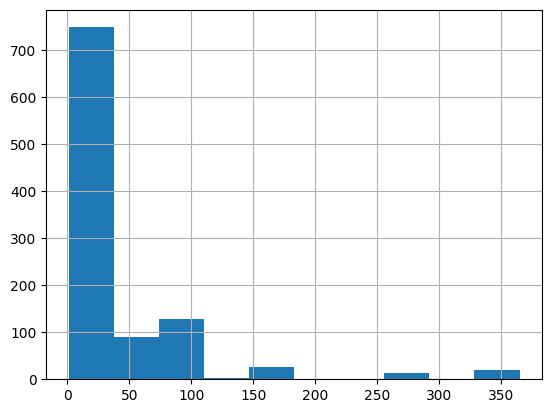

In [97]:
n_file['age'].hist()

list(data_age.groups)